In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from keras.models import Sequential

In [ ]:
img_width, img_height = 64, 64
dataset_path = './datasets/5-TRAFFIC-ANALYSIS-CNN/'

dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(img_width, img_height),
)
class_names = dataset.class_names

In [3]:
model = Sequential([
    Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(dataset, epochs=10, batch_size=32,verbose=0)
print(f'Accuracy: {x.history["accuracy"][-1] * 100:.2f}% | Loss: {x.history["loss"][-1]:.4f}')

Accuracy: 99.52% | Loss: 0.0210


9/9 [==============================] - 0s 4ms/step


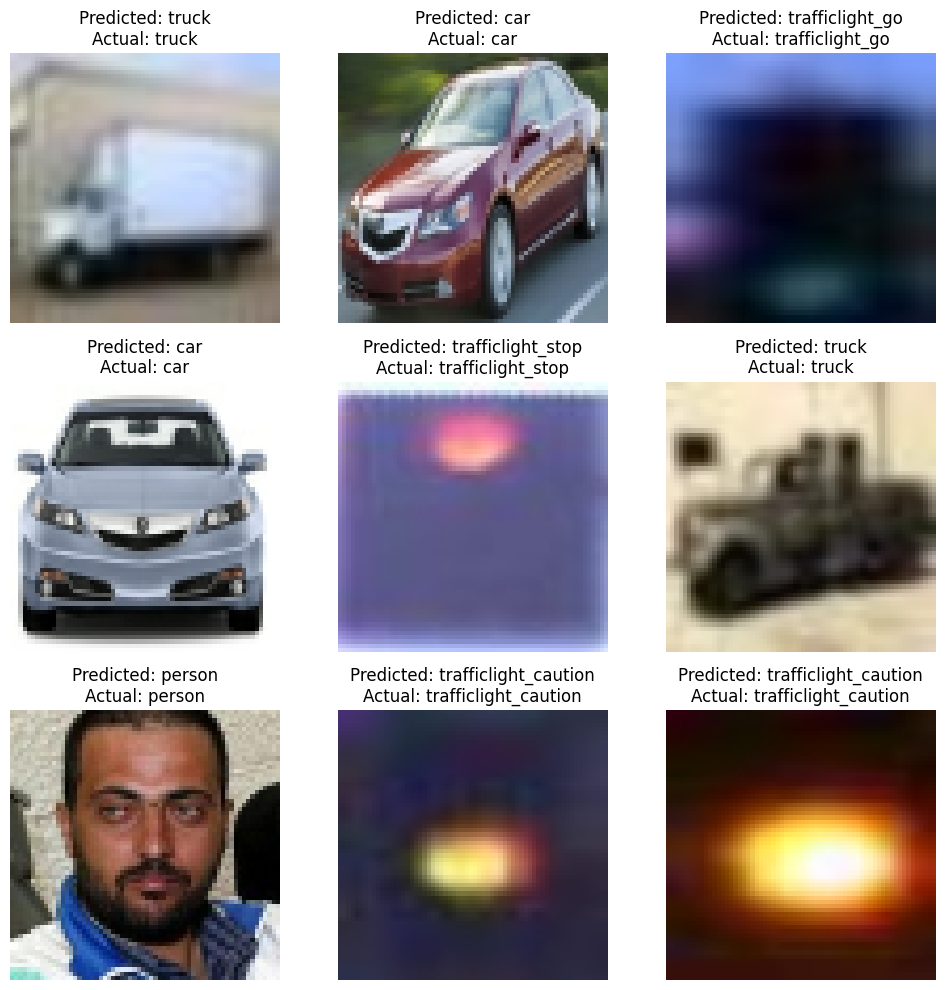

In [4]:
n = 9
X, y = [], []
for image, label in dataset.take(n):
    X.extend(image)
    y.extend(label.numpy())
y_pred = model.predict(np.array(X))
y_pred = np.argmax(y_pred, axis=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i in range(n):
    ax = axes[i // 3, i % 3]
    ax.imshow(X[i] / 255., cmap='gray')
    ax.set_title(f"Predicted: {class_names[y_pred[i]]}\nActual: {class_names[y[i]]}")
    ax.axis('off')
plt.tight_layout()